## Import libraries

In [1]:
import numpy as np
import pandas as pd

## Data framework

In [2]:
df = pd.read_csv('./TextFiles/smsspamcollection.tsv',sep='\t')
df.head()


print('Missing values: ')
print(df.isnull().sum(),'\n')

print('Categories: ',df['label'].unique(),'\n')


print('Rate of each category: ')
print(df['label'].value_counts())

Missing values: 
label      0
message    0
length     0
punct      0
dtype: int64 

Categories:  ['ham' 'spam'] 

Rate of each category: 
ham     4825
spam     747
Name: label, dtype: int64


## Visualization

#### Visualization of text label based on text length

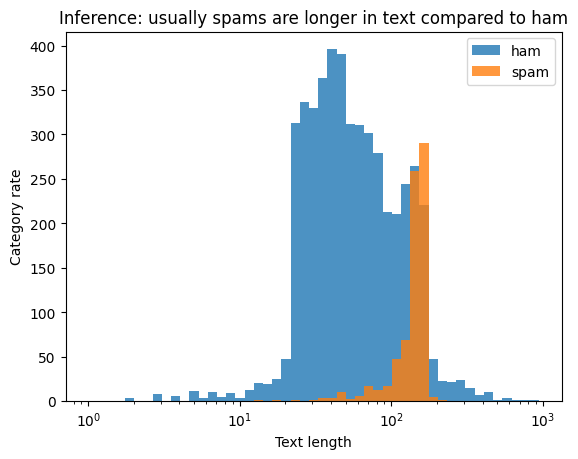

In [3]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.title('Inference: usually spams are longer in text compared to ham')
plt.xlabel('Text length') 
plt.ylabel('Category rate')
plt.show()

#### Visualization of text label based on text punctuation

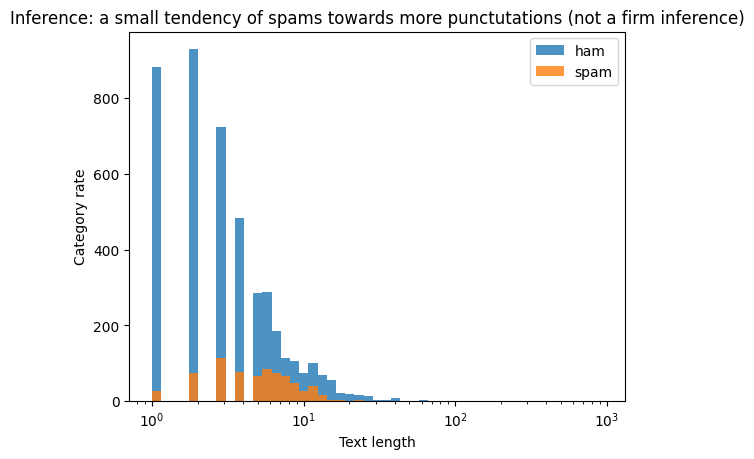

In [4]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['punct'], bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.title('Inference: a small tendency of spams towards more punctutations (not a firm inference)')
plt.xlabel('Text length') 
plt.ylabel('Category rate')
plt.show()

## Data Preprocessing

#### Features

In [5]:
X = df[['length','punct']]

#### Labels

In [6]:
y = df['label']

#### Data Splitting

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#### Shape of train and test data

In [8]:
print('train data shape:', X_train.shape)
print('test data shape:', X_test.shape)

train data shape: (3900, 2)
test data shape: (1672, 2)


## Classifier ML model pipeline

#### Training and Prediction

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

model.fit(X_train,y_train)

predictions = model.predict(X_test)

#### Confusion Matrix and Results

In [10]:
from sklearn import metrics
df_conf_mat= pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'], columns=['ham','spam'])
print(df_conf_mat,'\n')

clf_report = metrics.classification_report(y_test, predictions)
print(clf_report,'\n')

acc = metrics.accuracy_score(y_test,predictions)
print('Model accuracy: ', acc*100)

       ham  spam
ham   1370    81
spam   104   117 

              precision    recall  f1-score   support

         ham       0.93      0.94      0.94      1451
        spam       0.59      0.53      0.56       221

    accuracy                           0.89      1672
   macro avg       0.76      0.74      0.75      1672
weighted avg       0.88      0.89      0.89      1672
 

Model accuracy:  88.93540669856459
